In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd 
import numpy as np
from path import Path

In [2]:
#load data
file_path = Path("../Resources/cleaned_df.csv")
df = pd.read_csv(file_path)
df = df.drop(columns=['Unnamed: 0'])
df.head()

Category  PdDistrict      Resolution
0   WEAPON LAWS    SOUTHERN  ARREST, BOOKED
1   WEAPON LAWS    SOUTHERN  ARREST, BOOKED
2      WARRANTS     BAYVIEW  ARREST, BOOKED
3  NON-CRIMINAL  TENDERLOIN            NONE
4  NON-CRIMINAL     MISSION            NONE

In [3]:
df.Resolution[df.Resolution == 'ARREST, BOOKED'] = 1
df.Resolution[df.Resolution == 'NONE'] = 0
df.head()

Category  PdDistrict Resolution
0   WEAPON LAWS    SOUTHERN          1
1   WEAPON LAWS    SOUTHERN          1
2      WARRANTS     BAYVIEW          1
3  NON-CRIMINAL  TENDERLOIN          0
4  NON-CRIMINAL     MISSION          0

In [4]:
#encode the rest of the results via OneHotEncoder

#get categorical results 
categorical_vars = df.dtypes[df.dtypes=="object"].index.tolist()

#create OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

#fit and transform 
encode_df = pd.DataFrame(enc.fit_transform(df[categorical_vars]))

#rename encoded columns
encode_df.columns = enc.get_feature_names(categorical_vars)
encode_df.head()

Category_ARSON  Category_ASSAULT  Category_BAD CHECKS  Category_BRIBERY  \
0             0.0               0.0                  0.0               0.0   
1             0.0               0.0                  0.0               0.0   
2             0.0               0.0                  0.0               0.0   
3             0.0               0.0                  0.0               0.0   
4             0.0               0.0                  0.0               0.0   

   Category_BURGLARY  Category_DISORDERLY CONDUCT  \
0                0.0                          0.0   
1                0.0                          0.0   
2                0.0                          0.0   
3                0.0                          0.0   
4                0.0                          0.0   

   Category_DRIVING UNDER THE INFLUENCE  Category_DRUG/NARCOTIC  \
0                                   0.0                     0.0   
1                                   0.0                     0.0   
2                                   0.0                     0.0   
3                                   0.0                     0.0   
4                                   0.0                     0.0   

   Category_DRUNKENNESS  Category_EMBEZZLEMENT  ...  PdDistrict_INGLESIDE  \
0                   0.0                    0.0  ...                   0.0   
1                   0.0                    0.0  ...                   0.0   
2                   0.0                    0.0  ...                   0.0   
3                   0.0                    0.0  ...                   0.0   
4                   0.0                    0.0  ...                   0.0   

   PdDistrict_MISSION  PdDistrict_NORTHERN  PdDistrict_PARK  \
0                 0.0                  0.0              0.0   
1                 0.0                  0.0              0.0   
2                 0.0                  0.0              0.0   
3                 0.0                  0.0              0.0   
4                 1.0                  0.0              0.0   

   PdDistrict_RICHMOND  PdDistrict_SOUTHERN  PdDistrict_TARAVAL  \
0                  0.0                  1.0                 0.0   
1                  0.0                  1.0                 0.0   
2                  0.0                  0.0                 0.0   
3                  0.0                  0.0                 0.0   
4                  0.0                  0.0                 0.0   

   PdDistrict_TENDERLOIN  Resolution_0  Resolution_1  
0                    0.0           0.0           1.0  
1                    0.0           0.0           1.0  
2                    0.0           0.0           1.0  
3                    1.0           1.0           0.0  
4                    0.0           1.0           0.0  

[5 rows x 51 columns]

In [5]:
#merge dataframes
merged_df = df.merge(encode_df, right_index=True, left_index=True)
merged_df.head()

Category  PdDistrict Resolution  Category_ARSON  Category_ASSAULT  \
0   WEAPON LAWS    SOUTHERN          1             0.0               0.0   
1   WEAPON LAWS    SOUTHERN          1             0.0               0.0   
2      WARRANTS     BAYVIEW          1             0.0               0.0   
3  NON-CRIMINAL  TENDERLOIN          0             0.0               0.0   
4  NON-CRIMINAL     MISSION          0             0.0               0.0   

   Category_BAD CHECKS  Category_BRIBERY  Category_BURGLARY  \
0                  0.0               0.0                0.0   
1                  0.0               0.0                0.0   
2                  0.0               0.0                0.0   
3                  0.0               0.0                0.0   
4                  0.0               0.0                0.0   

   Category_DISORDERLY CONDUCT  Category_DRIVING UNDER THE INFLUENCE  ...  \
0                          0.0                                   0.0  ...   
1                          0.0                                   0.0  ...   
2                          0.0                                   0.0  ...   
3                          0.0                                   0.0  ...   
4                          0.0                                   0.0  ...   

   PdDistrict_INGLESIDE  PdDistrict_MISSION  PdDistrict_NORTHERN  \
0                   0.0                 0.0                  0.0   
1                   0.0                 0.0                  0.0   
2                   0.0                 0.0                  0.0   
3                   0.0                 0.0                  0.0   
4                   0.0                 1.0                  0.0   

   PdDistrict_PARK  PdDistrict_RICHMOND  PdDistrict_SOUTHERN  \
0              0.0                  0.0                  1.0   
1              0.0                  0.0                  1.0   
2              0.0                  0.0                  0.0   
3              0.0                  0.0                  0.0   
4              0.0                  0.0                  0.0   

   PdDistrict_TARAVAL  PdDistrict_TENDERLOIN  Resolution_0  Resolution_1  
0                 0.0                    0.0           0.0           1.0  
1                 0.0                    0.0           0.0           1.0  
2                 0.0                    0.0           0.0           1.0  
3                 0.0                    1.0           1.0           0.0  
4                 0.0                    0.0           1.0           0.0  

[5 rows x 54 columns]

In [6]:
merged_df = merged_df.drop(columns = "Category")
merged_df = merged_df.drop(columns = "PdDistrict")
merged_df = merged_df.drop(columns = "Resolution_0")
merged_df = merged_df.drop(columns = "Resolution_1")
merged_df_copy = merged_df.copy()
merged_df_copy = merged_df_copy.drop(columns="Resolution")
merged_df.head()

Resolution  Category_ARSON  Category_ASSAULT  Category_BAD CHECKS  \
0          1             0.0               0.0                  0.0   
1          1             0.0               0.0                  0.0   
2          1             0.0               0.0                  0.0   
3          0             0.0               0.0                  0.0   
4          0             0.0               0.0                  0.0   

   Category_BRIBERY  Category_BURGLARY  Category_DISORDERLY CONDUCT  \
0               0.0                0.0                          0.0   
1               0.0                0.0                          0.0   
2               0.0                0.0                          0.0   
3               0.0                0.0                          0.0   
4               0.0                0.0                          0.0   

   Category_DRIVING UNDER THE INFLUENCE  Category_DRUG/NARCOTIC  \
0                                   0.0                     0.0   
1                                   0.0                     0.0   
2                                   0.0                     0.0   
3                                   0.0                     0.0   
4                                   0.0                     0.0   

   Category_DRUNKENNESS  ...  PdDistrict_BAYVIEW  PdDistrict_CENTRAL  \
0                   0.0  ...                 0.0                 0.0   
1                   0.0  ...                 0.0                 0.0   
2                   0.0  ...                 1.0                 0.0   
3                   0.0  ...                 0.0                 0.0   
4                   0.0  ...                 0.0                 0.0   

   PdDistrict_INGLESIDE  PdDistrict_MISSION  PdDistrict_NORTHERN  \
0                   0.0                 0.0                  0.0   
1                   0.0                 0.0                  0.0   
2                   0.0                 0.0                  0.0   
3                   0.0                 0.0                  0.0   
4                   0.0                 1.0                  0.0   

   PdDistrict_PARK  PdDistrict_RICHMOND  PdDistrict_SOUTHERN  \
0              0.0                  0.0                  1.0   
1              0.0                  0.0                  1.0   
2              0.0                  0.0                  0.0   
3              0.0                  0.0                  0.0   
4              0.0                  0.0                  0.0   

   PdDistrict_TARAVAL  PdDistrict_TENDERLOIN  
0                 0.0                    0.0  
1                 0.0                    0.0  
2                 0.0                    0.0  
3                 0.0                    1.0  
4                 0.0                    0.0  

[5 rows x 50 columns]

In [7]:
df_cov_matrix = np.cov(merged_df_copy.T)


In [8]:
#calculate eigenvectors and eigenvalues on covariance matrix
eig_vals, eig_vecs = np.linalg.eig(df_cov_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('Eigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.71674625e-03  5.12263389e-04  3.97906099e-04 ...  2.36308416e-02
  -1.24270807e-02  1.59750302e-01]
 [-1.22458011e-01 -1.58088298e-02 -3.09264897e-04 ...  2.33713358e-02
  -1.24270807e-02  1.59750302e-01]
 [-1.66307729e-04 -3.65494303e-05 -8.69551856e-05 ...  2.56783585e-02
  -1.24270807e-02  1.59750302e-01]
 ...
 [ 1.66219060e-01 -9.04730731e-01 -7.54639690e-02 ...  1.89632454e-05
   3.15274030e-01  2.17112822e-02]
 [-2.91893104e-02  4.84336809e-02  1.09749789e-02 ...  6.16613401e-05
   3.15274030e-01  2.17112822e-02]
 [-4.19505356e-02  3.30379611e-02  3.94893282e-03 ... -3.61292169e-05
   3.15274030e-01  2.17112822e-02]]
Eigenvalues 
[ 2.30560379e-01  1.72685420e-01  1.29912373e-01  1.25455570e-01
  1.20584864e-01  1.05761760e-01  9.73691087e-02  8.60474372e-02
  7.36997369e-02  7.53716802e-02  6.97811517e-02  6.12047037e-02
  5.84453254e-02  5.21927546e-02  4.07547616e-02  3.80941121e-02
  3.88636981e-02  3.04426274e-02  2.71663545e-02  2.29269870e-02
  1.85695835

In [9]:
#sort eigenvalues in decreasing order. first value is most significant and forms our first principal component
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
0.23056037871946702
0.17268541959421094
0.12991237284891763
0.12545557014845138
0.12058486446538573
0.10576176047911597
0.09736910865194742
0.0860474372318357
0.07369973690778531
0.07537168020679674
0.06978115166275363
0.06120470368554841
0.058445325438191836
0.05219275456298636
0.040754761613601226
0.03809411213235801
0.03886369813782916
0.030442627354087835
0.027166354455815684
0.022926987043338447
0.018569583471330125
0.013521076253562405
0.011733159346843856
0.010964041894099063
0.006838770530232931
0.005920071036448766
0.00520116776903996
0.004556953200411766
0.004144945321656844
0.003909222089130194
0.0032350796652837943
0.0026357991905246398
0.001971988968137337
0.0017295366160474173
0.0011937028954032715
0.0010658895919585778
0.0009181212392245285
0.000476628669447893
0.00043106170927787563
0.00039548918604301493
0.00033479753703381175
0.00028584052215707603
0.0002506291335895881
0.00023428549177063415
0.0001390377457529688
2.793851622087273e-05

In [10]:
#selecting the number of principal components
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n", var_exp)
print("Cumulative variance captured as we travel with each component \n", cum_var_exp)

Variance captured by each component is 
 [13.114727247528954, 9.822685884632225, 7.389670963656281, 7.136159271242799, 6.859103964120328, 6.015936691315734, 5.538546169110205, 4.894547258778903, 4.2872892280544095, 4.19218580889084, 3.969288982600874, 3.481443774337556, 3.324484919187174, 2.9688264054408156, 2.318210898025882, 2.2106434927749956, 2.1668679290318864, 1.7316364444942518, 1.5452756062272797, 1.3041320601180402, 1.0562743853879433, 0.7691053777035604, 0.6674051519184973, 0.6236562403748742, 0.3890027016375261, 0.33674526976506125, 0.29585263972260456, 0.2592084495830525, 0.23577263210342259, 0.22236423158958427, 0.18401768625583, 0.14992943564274938, 0.11217060622425849, 0.09837944017117861, 0.06790016556508058, 0.060629893792486206, 0.05222453961720665, 0.02711157499340962, 0.024519636788554754, 0.022496201789346915, 0.019043941572829255, 0.01625917039693339, 0.014256277447007934, 0.01332661899538087, 0.007908740100050432, 0.0015891976842353803, 0.0011867936078953129, 1.4

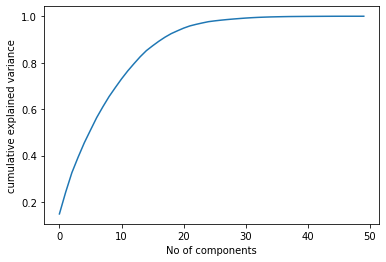

<Figure size 432x288 with 0 Axes>

In [11]:
#visualize above on a graph
pca = PCA().fit(merged_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of components')
plt.ylabel('cumulative explained variance')
plt.show()
plt.savefig(r'/Users/bkirton/Desktop/sanFranCrimePredictor/images/PCA_graph.png')

In [12]:
#initialize PCA model
pca = PCA(n_components=20)

crime_pca = pca.fit_transform(merged_df)

In [13]:
#transform PCA data to dataframe
crime_pca_df = pd.DataFrame(data=crime_pca, columns=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10","pc11","pc12","pc13","pc14","pc15","pc16","pc17","pc18","pc19","pc20"])
crime_pca_df['target'] = merged_df['Resolution']
crime_pca_df.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  0.590324  0.865943  0.345589  0.076680 -0.014600 -0.238612  0.103889   
1  0.590324  0.865943  0.345589  0.076680 -0.014600 -0.238612  0.103889   
2  0.745667  0.102938 -0.271994 -0.004932  0.193697  0.160801  0.560844   
3  0.006342 -0.527290  0.514250  0.083483  0.136196 -0.288631 -0.201875   
4  0.057776 -0.681044  0.461105 -0.435396 -0.605296 -0.369278 -0.473329   

        pc8       pc9      pc10  ...      pc12      pc13      pc14      pc15  \
0  0.051948  0.053492  0.032538  ... -0.124975  0.042212  0.026069 -0.061320   
1  0.051948  0.053492  0.032538  ... -0.124975  0.042212  0.026069 -0.061320   
2  0.594750  0.585203 -0.014225  ... -0.301915  0.004448  0.023625 -0.136199   
3  0.693804 -0.195343 -0.149407  ...  0.645581 -0.502625 -0.014972  0.061052   
4  0.332303  0.180589 -0.122255  ... -0.117448 -0.055136  0.002551  0.081293   

       pc16      pc17      pc18      pc19      pc20  target  
0  0.006058 -0.006825 -0.153008  0.038538  0.126669       1  
1  0.006058 -0.006825 -0.153008  0.038538  0.126669       1  
2 -0.039826  0.173289  0.700801 -0.053508 -0.123650       1  
3  0.031277 -0.076282  0.047261 -0.055470  0.065896       0  
4  0.006570 -0.016130 -0.001394 -0.014865  0.007538       0  

[5 rows x 21 columns]

In [14]:
#split PCA data into testing and training
y = crime_pca_df["target"].values 
X = crime_pca_df.drop(columns='target').values
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
#define deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = number_input_features*2
hidden_nodes_layer2 = number_input_features

nn = tf.keras.models.Sequential()

#add first hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

#add second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

#add output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#compile the model and customize metrics 
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
#train the deep nn
fit_model = nn.fit(X_train, y_train, epochs=50)

#evaluate the model 
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 110396 samples
Epoch 1/50
110396/110396 [==============================] - 14s 131us/sample - loss: 0.0163 - accuracy: 0.9935
Epoch 2/50
110396/110396 [==============================] - 12s 108us/sample - loss: 4.6212e-06 - accuracy: 1.0000
Epoch 3/50
110396/110396 [==============================] - 12s 107us/sample - loss: 5.0397e-07 - accuracy: 1.0000
Epoch 4/50
110396/110396 [==============================] - 12s 106us/sample - loss: 6.9835e-08 - accuracy: 1.0000
Epoch 5/50
110396/110396 [==============================] - 12s 107us/sample - loss: 1.4020e-08 - accuracy: 1.0000
Epoch 6/50
110396/110396 [==============================] - 12s 109us/sample - loss: 4.6575e-09 - accuracy: 1.0000
Epoch 7/50
110396/110396 [==============================] - 12s 108us/sample - loss: 2.3200e-09 - accuracy: 1.0000
Epoch 8/50
110396/110396 [==============================] - 12s 108us/sample - loss: 1.6989e-09 - accuracy: 1.0000
Epoch 9/50
110396/110396 [==============================] - 

In [18]:
inertia = []
k = list(range(1,11))

#calc inertia for range of k values
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(crime_pca_df)
    inertia.append(km.inertia_)
#create elbow curve
elbow_data = {"k":k, "inertia":inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.hvplot.line(x="k", y='inertia', xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [20]:
#initialize k-means model
model = KMeans(n_clusters=2)
model.fit(crime_pca_df)
predictions = model.predict(crime_pca_df)

#add predicted class column
crime_pca_df["class"] = model.labels_
crime_pca_df.head(20)

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0   0.590324  0.865943  0.345589  0.076680 -0.014600 -0.238612  0.103889   
1   0.590324  0.865943  0.345589  0.076680 -0.014600 -0.238612  0.103889   
2   0.745667  0.102938 -0.271994 -0.004932  0.193697  0.160801  0.560844   
3   0.006342 -0.527290  0.514250  0.083483  0.136196 -0.288631 -0.201875   
4   0.057776 -0.681044  0.461105 -0.435396 -0.605296 -0.369278 -0.473329   
5  -0.022641 -0.402212 -0.088738  0.794639 -0.262323 -0.272957  0.492478   
6   0.871506  0.973829  0.166605  0.108335  0.093860  0.275390 -0.489983   
7   0.006342 -0.527290  0.514250  0.083483  0.136196 -0.288631 -0.201875   
8   0.663966  0.919745  0.308464  0.072127 -0.025215 -0.351233  0.159683   
9  -0.001415 -0.380661  0.179191  0.010794  0.151253  0.593902  0.415696   
10 -0.693364  0.086814 -0.308672 -0.137713  0.020967  0.236429  0.033806   
11 -0.042205 -0.574793  0.546524  0.076011  0.143021 -0.088330 -0.302737   
12  0.953207  0.157022 -0.413852  0.031277  0.312772  0.787424 -0.088822   
13  0.739433  0.019755 -0.160071  0.010014  0.081659 -0.160503  0.799829   
14 -0.119262 -0.368404  0.042513 -0.272195  0.654716 -0.306664 -0.073623   
15  0.584315  0.866742  0.344966  0.080092 -0.010539 -0.243680  0.093521   
16  0.067011 -0.429285  0.079044 -0.512937 -0.674869 -0.048720 -0.104844   
17  0.162508 -0.453521  0.107575 -0.508017 -0.720385 -0.184657  0.436796   
18  0.085084 -0.367849  0.215664  0.016203  0.032718  0.114528  0.705436   
19 -0.122323 -0.374990 -0.119298  0.794921 -0.208836 -0.139479 -0.057980   

         pc8       pc9      pc10  ...      pc13      pc14      pc15      pc16  \
0   0.051948  0.053492  0.032538  ...  0.042212  0.026069 -0.061320  0.006058   
1   0.051948  0.053492  0.032538  ...  0.042212  0.026069 -0.061320  0.006058   
2   0.594750  0.585203 -0.014225  ...  0.004448  0.023625 -0.136199 -0.039826   
3   0.693804 -0.195343 -0.149407  ... -0.502625 -0.014972  0.061052  0.031277   
4   0.332303  0.180589 -0.122255  ... -0.055136  0.002551  0.081293  0.006570   
5  -0.555247  0.056598  0.024906  ...  0.059278 -0.007027  0.039233  0.013233   
6  -0.169498  0.065593 -0.032099  ...  0.005018  0.007105  0.034387  0.025913   
7   0.693804 -0.195343 -0.149407  ... -0.502625 -0.014972  0.061052  0.031277   
8   0.142357  0.056953  0.049130  ...  0.056879  0.027965 -0.162865  0.016027   
9   0.177627  0.560052  0.014472  ... -0.049466 -0.079035 -0.173428 -0.116618   
10  0.287300 -0.476066  0.683314  ... -0.154855 -0.010918  0.051466  0.027704   
11  0.580356 -0.390665  0.614241  ... -0.133683  0.016863  0.091024  0.035249   
12  0.282896  0.593844 -0.095455  ... -0.047412  0.002765  0.061053 -0.029940   
13 -0.198486 -0.599992 -0.649315  ...  0.009290  0.019439  0.166214 -0.013530   
14 -0.491564  0.142639  0.140390  ...  0.011083 -0.006019 -0.392275 -0.565064   
15  0.042718  0.048728  0.034200  ...  0.048048  0.026484 -0.054903  0.010334   
16 -0.226692  0.118022  0.040024  ... -0.085916 -0.012472 -0.141347 -0.042725   
17 -0.495144  0.060750  0.004473  ...  0.032080 -0.015963  0.073822  0.007824   
18 -0.474665 -0.593307 -0.623480  ... -0.063023 -0.007820  0.101501 -0.034549   
19 -0.287978  0.107123  0.080046  ... -0.023327  0.004168 -0.160434 -0.027812   

        pc17      pc18      pc19      pc20  target  class  
0  -0.006825 -0.153008  0.038538  0.126669       1      1  
1  -0.006825 -0.153008  0.038538  0.126669       1      1  
2   0.173289  0.700801 -0.053508 -0.123650       1      1  
3  -0.076282  0.047261 -0.055470  0.065896       0      0  
4  -0.016130 -0.001394 -0.014865  0.007538       0      0  
5   0.013765  0.076157  0.003685 -0.057345       0      0  
6  -0.015669 -0.033266 -0.034547  0.059317       1      1  
7  -0.076282  0.047261 -0.055470  0.065896       0      0  
8   0.162508  0.702911 -0.060563 -0.110384       1      1  
9   0.061619  0.110191  0.793284  0.507178       0      0  
10  0.024069 -0.001127 -0.004414 -0.022494       0

In [21]:
#plot the clusters
crime_pca_df.hvplot.scatter(x="pc1", y="pc2", hover_cols=["class"], by="class")

:NdOverlay   [class]
   :Scatter   [pc1]   (pc2,class)